In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pickle
import timeit
from collections import OrderedDict
import pprint
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

# Sections of the report 

-	Introduction
-	Methods
    -	Cleaning the data and creating new input features
    - Analysing and visualising the data
    - Preparing the inputs and choosing suitable features
    - Selecting and training a model
-	Evaluation

-	Conclusion

## 1. Introduction

The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators globally have made the industry competititive. Companies are working hard to survive in this competitive market depending on multiple strategies.

There are often three main strategies for generating more revenue within a business: 
1) Acquiring new customers
2) Upselling existing customers 
3) Increase the retention period of customers

However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy. 
The reason being is that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. 
To apply the third strategy, we need to decrease the potential of customer churn by putting systems in place to do so. Hence why exploring machine learning techniques for predicting customer churn can provide huge financial benefits to companies. 

## 2. Method

### 2.1 Loading and cleaning the data set

In [15]:
# Load the datasets
train = pd.read_csv('../proposal_docs/dataset/train.csv', index_col= False)
test = pd.read_csv('../proposal_docs/dataset/test.csv', index_col= False)



### Cleaning the dataset 

a) **Check for Null-values and inconsistent data types:** Upon looking at that dataset, we can see that each column has an equal amount of non-null values, indicating that there are **no instances** of missing data. 

However, the datatypes in the datasets are of type objet, int64, float64 indicating varying data types and a mixture between categorical and numerical variables

In [16]:
# Check for Null-values
print(train.info(null_counts=True))
print(test.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

/var/folders/c7/z0bvk50x03b6fcy69xld3sq9hzw1gf/T/ipykernel_52459/148985564.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(train.info(null_counts=True))
/var/folders/c7/z0bvk50x03b6fcy69xld3sq9hzw1gf/T/ipykernel_52459/148985564.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(test.info(null_counts=True))


In [17]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [18]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


b) **Check for duplicate values**: No duplicate values were found

In [19]:
datasets = [train, test]

for data in datasets: 
    duplicate_rows = data[data.duplicated()]
    print(len(duplicate_rows))

0
0


### 2.1.2 Create new input features
- Created additional features `total_minutes`, `total_calls`  and `total_charges` to obsverve correlations and and see if that affects the model as well
- One-hot encoded the categorical features to in order to create a correlation matrix of all features
- label encoded the target variables 

In [20]:
def add_total_minutes_calls_charge(dataset):
    """
    Function for totally the minutes, calls and charges features
    :dataset: churn X_train or X_test dataset
    """
    dataset['total_minutes'] = dataset['total_day_minutes']  + dataset['total_eve_minutes'] + dataset['total_night_minutes']+ dataset['total_intl_minutes']
    dataset['total_calls'] = dataset['total_day_calls'] + dataset['total_eve_calls'] + dataset['total_night_calls'] + dataset['total_intl_calls']
    dataset['total_charge'] = dataset['total_day_charge'] + dataset['total_eve_charge'] + dataset['total_night_charge'] + dataset['total_intl_charge']
    return dataset

train = add_total_minutes_calls_charge(train)
test  = add_total_minutes_calls_charge(test)

In [21]:
# Convert the Y_train to 0 and 1 

le = LabelEncoder()
train['churn'] = le.fit_transform(train['churn'])

In [22]:
# Convert the categorical variables to 1 hot encoding
cols = train.columns
feature_cols = list(train.columns)
feature_cols.remove('churn')

# Get the numerical and categorical columns
num_cols = train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

#one hot encode the testing and training set
train_one_hot = pd.get_dummies(data = train, columns = cat_cols)
test_one_hot = pd.get_dummies(data = test, columns = cat_cols)

# Get feature cols
feature_cols = [x for x in train_one_hot.columns if x != 'churn' ]


### 2.1.3 Create a validation set

Despite there being a already a test set in place, a preliminary validation set was created, to evaluate the performance of the model and to see how well the model could
generalise on unseen data. The training data was split with an 80/20 split in stratified fashion.


In [23]:
# create X and y datasets for machine learning purposes
X_train, y_train, X_test = train_one_hot[feature_cols], train['churn'], test_one_hot[feature_cols]

# Split the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=27)

# Resets the indexes
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


### 2.2 Analysing and Visualising the dataset

#### 2.2.1 Visualising the class distribution


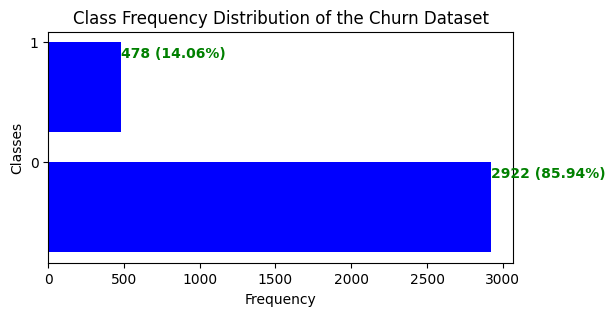

In [12]:
class_value_counts = y_train.value_counts()
classes = np.array(class_value_counts.keys())
class_freq = class_value_counts.values
title = 'Churn'

def get_pct(array, value):
    """
    Gets the percentage of a value in proportion to the sum of an array
    return: pct_string
    """
    pct = value/array.sum()
    pct_string =  " ({:.2%})".format(pct)
    return pct_string
#
def plot_class_dist(data,classes, title):
    """
    Plots a 2-D plot, showing the relationship between classes and frequency
    Plots the images seen in Figure 2 of the report. 
    """
    fig, ax = plt.subplots(figsize=(6, 3))    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(classes, minor=False)
    plt.title("Class Frequency Distribution of the " + title +  " Dataset")
    plt.xlabel('Frequency')
    plt.ylabel('Classes')
    for i, v in enumerate(data):
        ax.text(v + 3, i + .25, str(v) + get_pct(data,v), color='green', fontweight='bold')
    plt.show()
    
plot_class_dist(class_freq, classes, title)

It is evident that the churn dataset is highly imbalanced, with 85% of the dataset not churned while a decent 14% of the dataset being churned. 

#### 2.2.2 Visualising the distributions of the numerical features

Most of the features tend to form a normal distribution, so aren't majorly right skewed or left skewed. However, number_service_calls, total international calls, number_vmail_messages are more right skewed than others

array([[<AxesSubplot: title={'center': 'account_length'}>,
        <AxesSubplot: title={'center': 'number_vmail_messages'}>,
        <AxesSubplot: title={'center': 'total_day_minutes'}>,
        <AxesSubplot: title={'center': 'total_day_calls'}>],
       [<AxesSubplot: title={'center': 'total_day_charge'}>,
        <AxesSubplot: title={'center': 'total_eve_minutes'}>,
        <AxesSubplot: title={'center': 'total_eve_calls'}>,
        <AxesSubplot: title={'center': 'total_eve_charge'}>],
       [<AxesSubplot: title={'center': 'total_night_minutes'}>,
        <AxesSubplot: title={'center': 'total_night_calls'}>,
        <AxesSubplot: title={'center': 'total_night_charge'}>,
        <AxesSubplot: title={'center': 'total_intl_minutes'}>],
       [<AxesSubplot: title={'center': 'total_intl_calls'}>,
        <AxesSubplot: title={'center': 'total_intl_charge'}>,
        <AxesSubplot: title={'center': 'number_customer_service_calls'}>,
        <AxesSubplot: title={'center': 'total_minutes'}>]

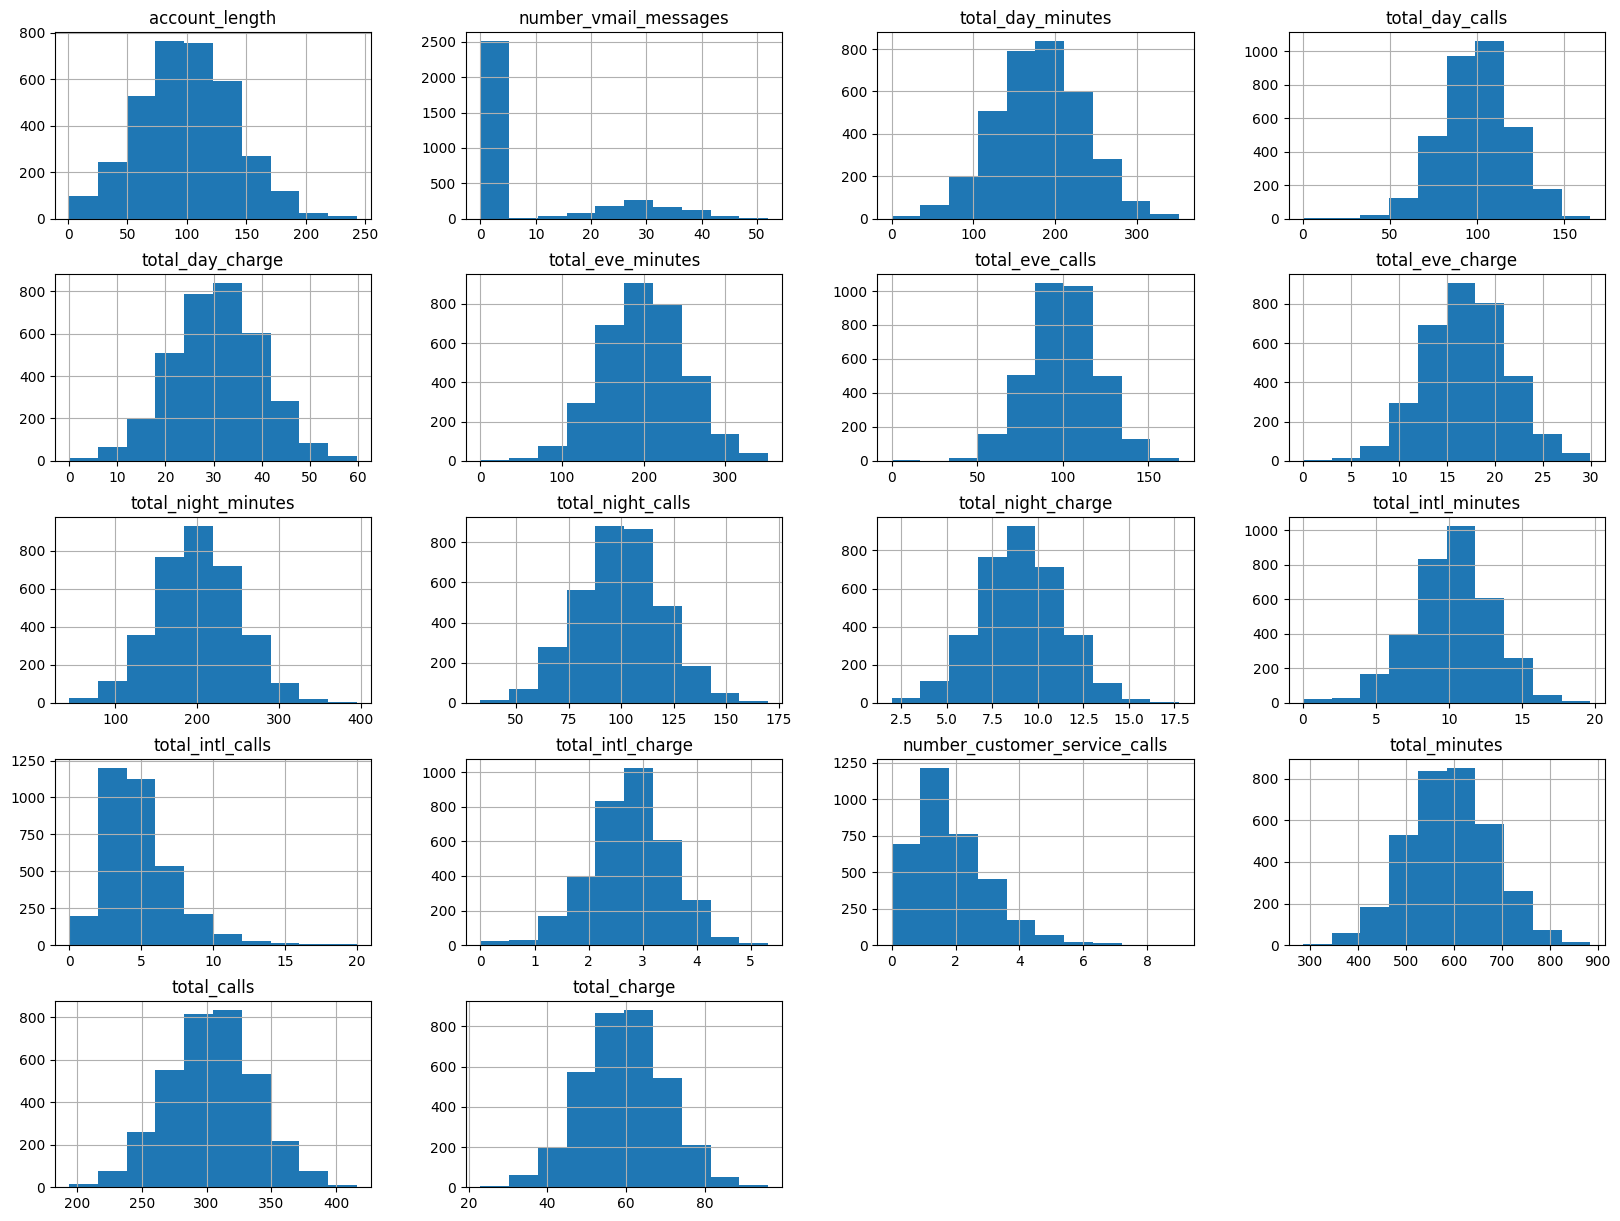

In [13]:
X_train.iloc[:,0:18].hist(figsize = (20,15))

#### 2.2.3 Correlation matrix 



In [14]:
corr = train_one_hot.corr()

top_features_corr = corr['churn'].sort_values(ascending = False).head(10)
top_features = top_features_corr.index.values
top_features_corr

churn                            1.000000
international_plan_yes           0.259053
total_charge                     0.237792
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
total_minutes                    0.203669
voice_mail_plan_no               0.114643
total_eve_minutes                0.078855
total_eve_charge                 0.078852
Name: churn, dtype: float64

In [15]:
bot_features_corr = corr['churn'].sort_values(ascending = True).head(10)
bot_features = list(bot_features_corr.index.values)
bot_features.append('churn')
bot_features_corr

international_plan_no   -0.259053
voice_mail_plan_yes     -0.114643
number_vmail_messages   -0.100347
state_VA                -0.040493
state_HI                -0.034674
total_intl_calls        -0.034334
state_RI                -0.029826
state_WI                -0.028649
state_NE                -0.027455
state_AK                -0.026074
Name: churn, dtype: float64

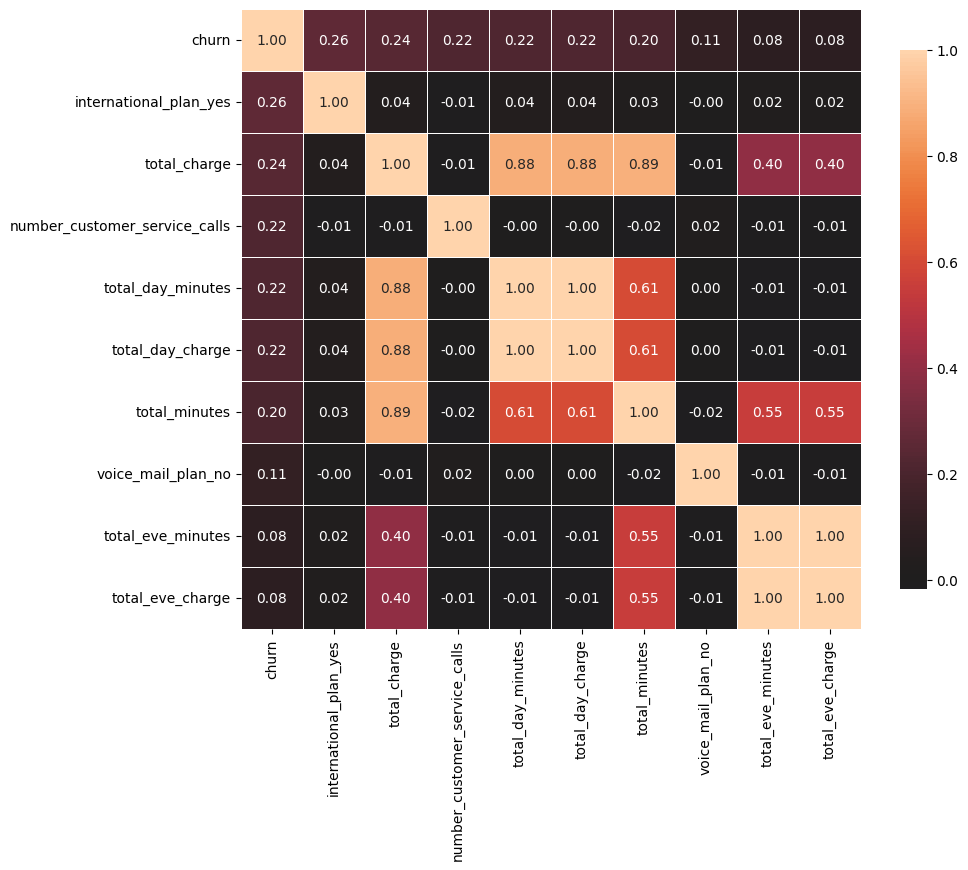

In [16]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(train_one_hot[top_features])


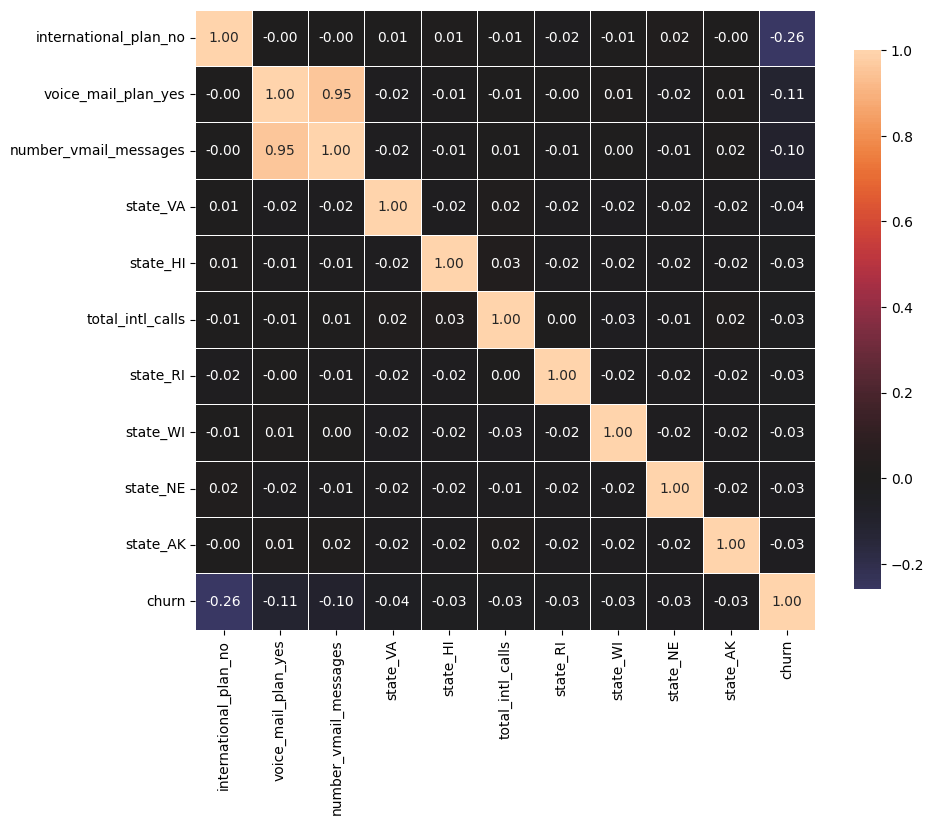

In [17]:
correlation_heatmap(train_one_hot[bot_features])

#### 2.2.3 Plots vs churn

<AxesSubplot: xlabel='international_plan', ylabel='count'>

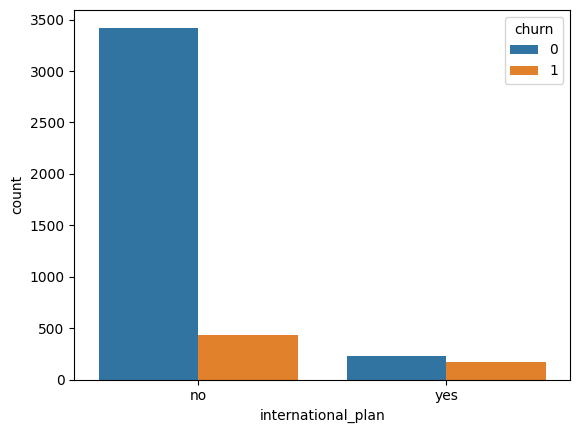

In [18]:
sns.countplot(data=train, x="international_plan", hue="churn")


<AxesSubplot: xlabel='churn', ylabel='count'>

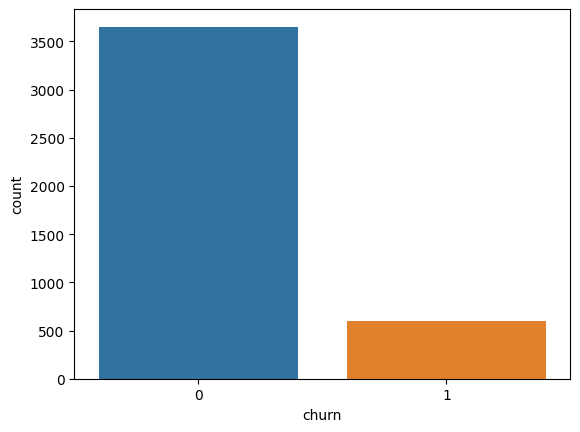

In [19]:
sns.countplot(x=train["churn"])

<AxesSubplot: xlabel='total_charge', ylabel='Count'>

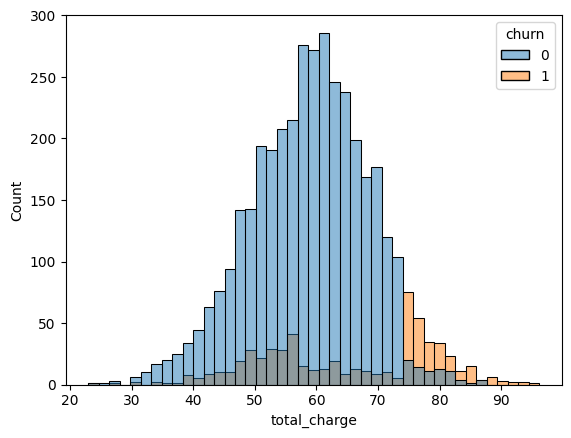

In [20]:
sns.histplot(data=train, x="total_charge", hue="churn")

<AxesSubplot: xlabel='total_minutes', ylabel='Count'>

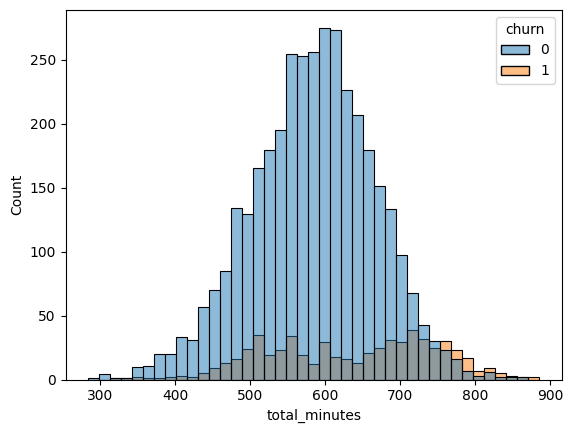

In [21]:
sns.histplot(data=train, x="total_minutes", hue="churn")


### 2.2.4 Plot the scatterplots - maybe consider plotting a pair plot as well

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='total_charge', ylabel='total_day_minutes'>

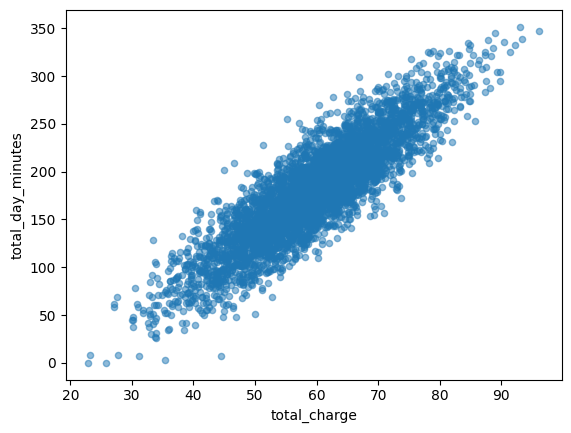

In [22]:
train.plot(kind='scatter', x='total_charge', y='total_day_minutes', alpha=0.5)


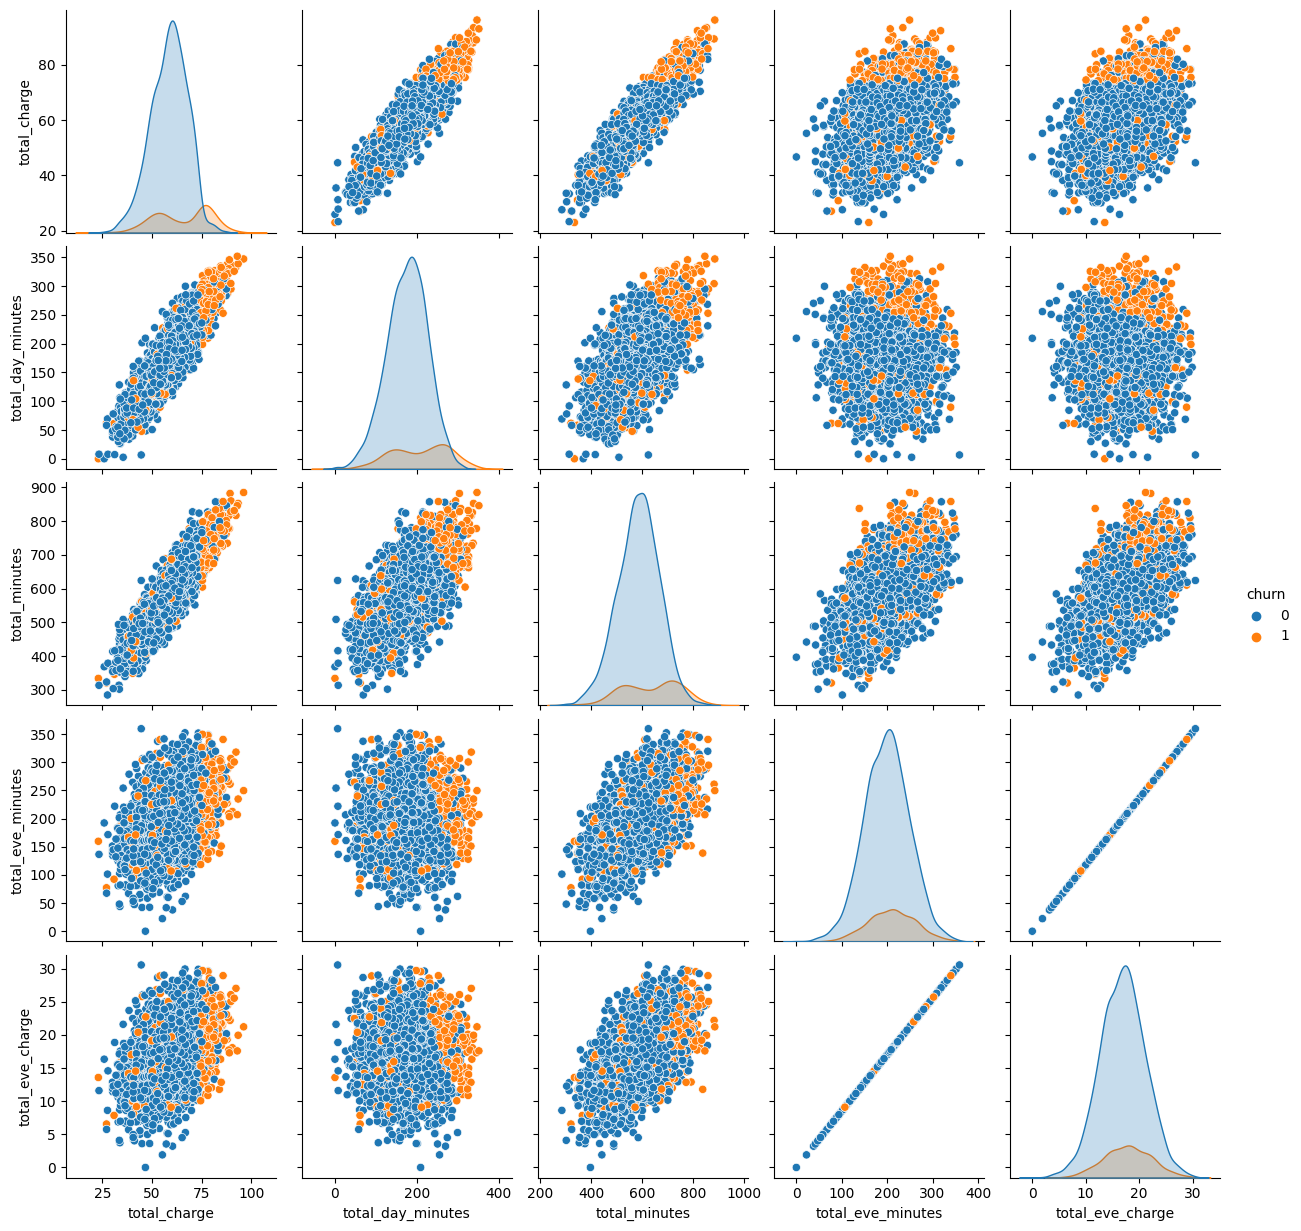

In [30]:
pos_features = ['churn', 'total_charge', 'total_day_minutes', 'total_minutes', 'total_eve_minutes', 'total_eve_charge']
neg_features = ['churn','international_plan_no', 'voice_mail_plan_yes', 'number_vmail_messages']


sns.pairplot(train_one_hot[pos_features], hue = 'churn')

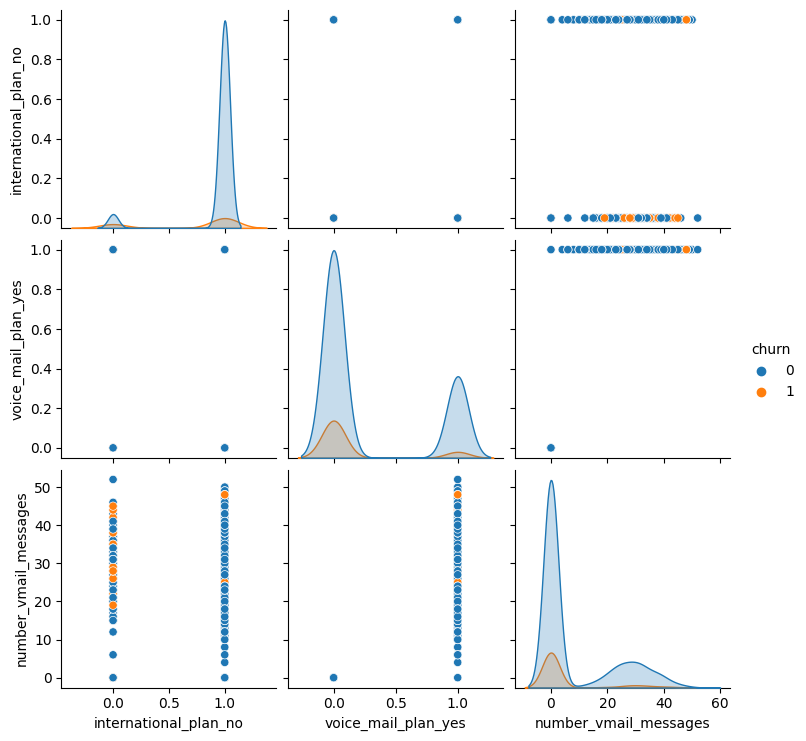

In [32]:
sns.pairplot(train_one_hot[neg_features], hue = 'churn')

In [33]:
train_one_hot[["total_charge", "total_day_minutes", "total_minutes"]]

,total_charge,total_day_minutes,total_minutes
0,59.24,161.6,625.2
1,62.29,243.4,539.4
2,66.80,299.4,564.8
3,52.09,166.7,512.0
4,78.31,218.2,786.8
...,...,...,...
4245,65.13,188.3,656.1
4246,52.88,177.9,506.8
4247,53.10,170.7,499.8
4248,75.09,235.7,766.1


## 2.3 Preparing the inputs and choosing suitable features 

In order to pick the best features, i'll create a few datasets with subsets of features and then train a model using 5 fold cross validation to find 
the best dataset to use for hyperparameter tuning.

These are the datasets that will be created: 

- Full dataset
- Top 10 features that correlated with churn
- Recursive feature elimination (RFE)



In [24]:
voters = [('lgbm', LGBMClassifier(verbosity = -1, num_threads = 8)),
          ('rf', RandomForestClassifier()),
          ('xgb', XGBClassifier(verbosity = 0)),
          ('cat', CatBoostClassifier(verbose=True))]
        

models = {'logreg': LogisticRegression(),
          'lgbm': LGBMClassifier(verbosity = -1, num_threads = 8), 
          'xgb': XGBClassifier(verbosity = 0), 
          'rf': RandomForestClassifier(n_jobs = -1),
          'cat': CatBoostClassifier(verbose=True),
          'vc:': VotingClassifier(estimators=voters, voting='soft')}


In [ ]:
# catboost, xgboost, logistic regression, lgbm, mlp classifier, random forest

def evaluate_rfe(RFEClassifier, X_train, y_train): 
    """
   # Evaluates the recursive feature elimination performance for a given model using the LGBM classifier
   # :returns: cross_validation scores
    """
    # create pipeline
    rfe = RFECV(estimator=RFEClassifier)
    model = LGBMClassifier()
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('feature_selection',rfe),('model',model)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

scores, names = list(), list()
eval_rfe_results = {}

for model in models: 
    print(model)
    score = evaluate_rfe(models[model], X_train, y_train)
    scores.append(score)
    names.append(model)
    eval_rfe_results [model] = score
    print('>%s %.3f (%.3f)' % (model, mean(score), std(score)))

results = pd.DataFrame(eval_rfe_results)
results.to_csv('results/eval_rfe_results.csv', index=False, header=True)


In [43]:
def plot_box_plot(X, labels, xlabel, ylabel, title, filename, figsize):
    """
    Plots a boxplot of values while annotating the mean and standard deviation
    :X: The input data
    :labels: column labels of the input data
    :xlabel: x axis label
    :ylabel: y axis label
    :filename: Name of the figure file
    :figsize: size of the boxplot
    :t: vector of fit times
    """
    
    # Plot boxpot
    fig, ax = plt.subplots(figsize=figsize)
    bp = plt.boxplot(X, labels=labels, showmeans=True) 
    
    # Annotate the boxplot with mean and std
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    for i, line in enumerate(bp['medians']):
        x, y = line.get_xydata()[1]
        text = ' μ={:.3f}\n σ={:.3f}'.format(mean[i], std[i])
        ax.annotate(text, xy=(x, y))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

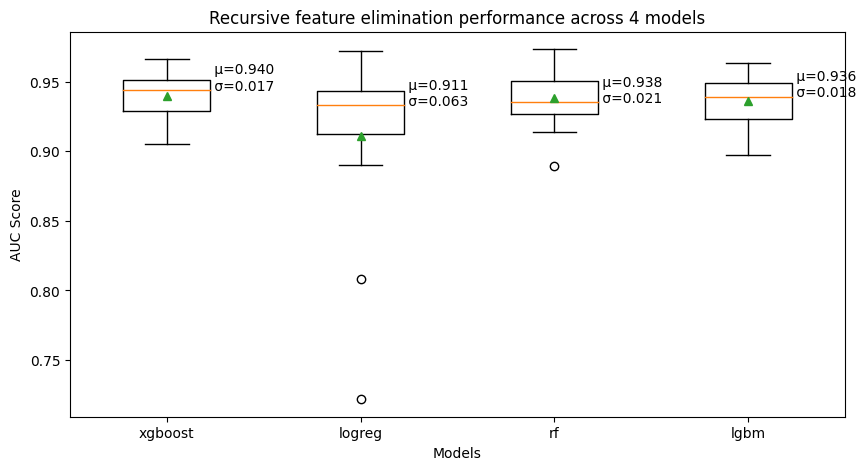

In [44]:
results_df = pd.read_csv('results/eval_rfe_results.csv')

plot_box_plot(X=results_df.values,  
              labels=results_df.columns, 
              xlabel = 'Models', 
              ylabel = 'AUC Score',
              title = 'Recursive feature elimination performance across 4 models',
              filename = 'images/eval_rfe_results.png',
              figsize = (10,5))

In [25]:
def rfe (X_train, y_train, classifier):
    """
    Implements recursive feature elimination with 5 fold cross validation
    :X_train: 
    :y_train: 
    :return: transformed dataframe (X_train_rfe), features selected
    """
    estimator = classifier
    selector = RFECV(estimator, step=3, cv=5, scoring = 'roc_auc')
    selector = selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train) # transform the training set
    X_val_rfe = selector.transform(X_val)  # transform the validation set with the training fit
    X_test_rfe = selector.transform(X_test) # transform the test set with the training fit
    
    features_selected = {}
    
    for i in range(len(selector.support_)):
        if selector.support_[i] == True:
            features_selected[i] = selector.feature_names_in_[i]
        
    return X_train_rfe,  X_val_rfe, X_test_rfe, features_selected

X_train_rfe, X_val_rfe, X_test_rfe, features_selected = rfe(X_train, y_train, models['xgb'])

/Users/bkhalidson/Documents/2. CMC/projects/venvs/chenv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/bkhalidson/Documents/2. CMC/projects/venvs/chenv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/bkh

In [39]:
features_selected

{1: 'number_vmail_messages',
 11: 'total_intl_minutes',
 12: 'total_intl_calls',
 14: 'number_customer_service_calls',
 17: 'total_charge',
 18: 'international_plan_no',
 72: 'area_code_area_code_415'}

In [47]:
# remove churn from top features array as it is the target variables
churn_index = 0
top_features = np.delete(top_features, churn_index)

X_train_datasets = {'full_dataset': X_train, 
                'top_10_features': X_train[top_features], 
                'RFE' : X_train_rfe}

In [ ]:
"""
with open('X_train_list.pickle', 'wb') as f:
    pickle.dump(X_train_list, f)
"""

In [12]:
with open('../pickle_files/X_train_list.pickle', 'rb') as f:
    X_train_datasets = pickle.load(f)


## 2.4 Train the models


### 2.4.1 Find top peforming dataset

Here we evaluate the top peforming 

In [48]:
def cross_validate(model, X_train, y_train): 
    """
    Evaluates trainiing performance with repeated stratified cross validation of a given dataset
    :returns: cross_validation scores
    """
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

In [ ]:
scores, names = list(), list()
eval_dataset_results = {}

for X_train in X_train_datasets: 
    print(X_train)
    score = cross_validate(models['lgbm'], X_train_datasets[X_train], y_train)
    scores.append(score)
    names.append(X_train)
    eval_dataset_results [X_train] = score
    print('>%s %.3f (%.3f)' % (X_train, score.mean(), score.std()))

results = pd.DataFrame(eval_dataset_results)
results.to_csv('results/eval_dataset_results.csv', index=False, header=True)

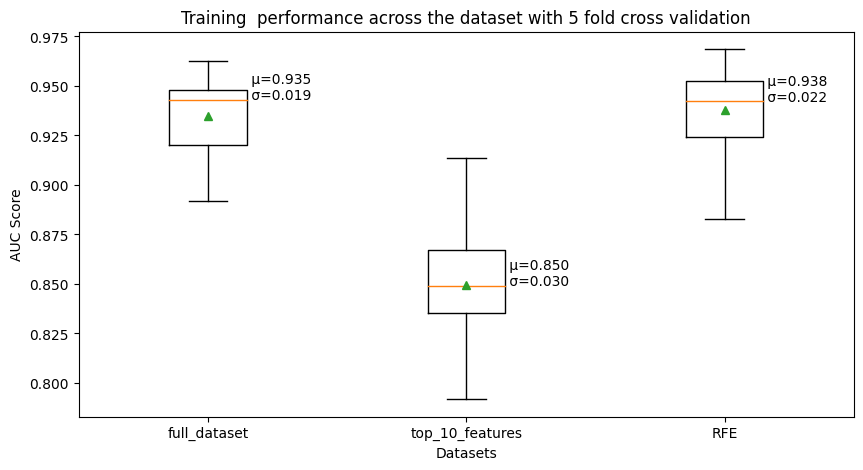

In [51]:
results_df = pd.read_csv('results/eval_dataset_results.csv')

plot_box_plot(X=results_df.values,  
              labels=results_df.columns, 
              xlabel = 'Datasets', 
              ylabel = 'AUC Score',
              title = 'Training  performance across the dataset with 5 fold cross validation',
              filename = 'images/eval_dataset_results.png',
              figsize = (10,5))

### 2.4.2 Find top peforming models

In this section we compare the performance of the 5 models with their default parameters with 10 fold cross validation on the Rfe dataset: 
- Logistic Regression
- Catboost 
- XgBoost 
- random forest
- Ligthgbm 

In [ ]:

def evaluate_models(models, X, y , csv_name):
    """
    Model list setup for evaluation
    :X_train: type of dataset
    :models: Dictionary of models
    :filenme: filename of the results
    """
    
    # Set up data storage
    scores, names, times  = list(), list(), list()
    eval_dataset_results = {}

    for model in models: 
        # Run the evaluation
        start = timeit.default_timer()
        print(f'Evaluation has started on {model}')
        score = cross_validate(models[model], X, y)
        
        # store values
        scores.append(score)
        names.append(X_train)
        eval_dataset_results[model] = score
        end = timeit.default_timer()
        t = end - start
        times.append(t)

    # Store the final results
    results = pd.DataFrame(eval_dataset_results)
    results.to_csv(csv_name, index=False, header=True)
    
    return results, times
    
    


In [ ]:
results, times = evaluate_models(models=models, 
                                       X= X_train_list['RFE'], 
                                       y = y_train
                                       csv_name = 'results/eval_model_results.csv')

In [52]:
results = pd.read_csv('../results/eval_model_results.csv')

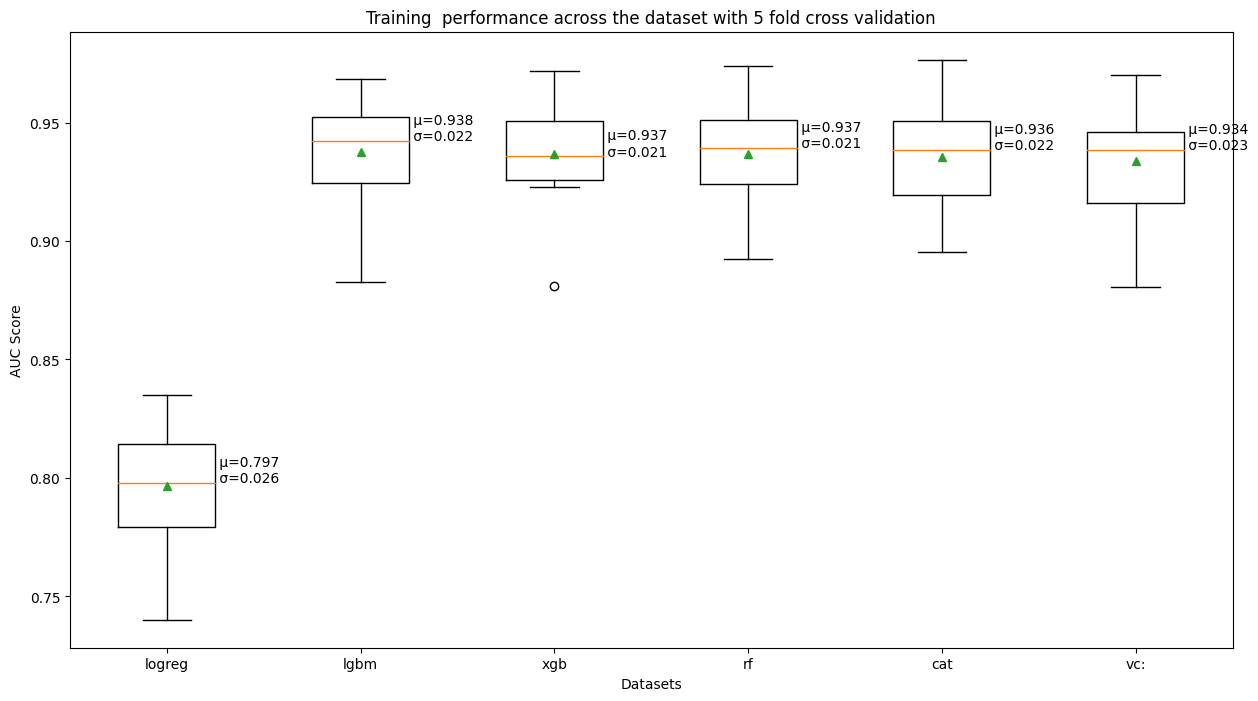

In [53]:
plot_box_plot(X=results.values,  
              labels=results.columns, 
              xlabel = 'Datasets', 
              ylabel = 'AUC Score',
              title = 'Training  performance across the dataset with 5 fold cross validation',
              filename = 'images/eval_model_results.png',
              figsize = (15,8))

### 2.4.3 Hyperparameter tuning of top models

#### Bayesian Optimisation

Bayesian optimization works by constructing a posterior distribution of functions (gaussian process) that best describes the function you want to optimize. As the number of observations grows, the posterior distribution improves, and the algorithm becomes more certain of which regions in parameter space are worth exploring and which are not, as seen in the picture below.

![bayesian_opt](images/bo_example.png)



First we create a wrapper function to report the results of each of the hyperparameter sessions

In [ ]:
def report_perf(optimizer, X, y, model_name,  csv_name, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = timeit.default_timer()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    d.to_csv(csv_name, index=False, header=True)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    duration = timeit.default_timer() - start
    print((model_name + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (duration, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params, duration

In [ ]:
# hyper parameters spaces of each of the models

# Setting the search space
lgbm_search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),     # Boosting learning rate
    'n_estimators': Integer(30, 5000),                   # Number of boosted trees to fit
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
   }

rf_search_spaces = {
    'bootstrap': Categorical([True, False]),             # Method of selecting samples for training each tree
    'max_depth': Integer(1, 200),                        # Maximum number of levels in tree
    'max_features': Categorical(['auto', 'sqrt']),       # Number of features to consider at every split
    'min_samples_leaf': Integer(1, 5),                   # Minimum number of samples required at each leaf node
    'min_samples_split': Integer(2, 10),                 # Minimum number of samples required to split a node
    'n_estimators': Integer(200, 2000)}                  # Number of trees in the random forest
    
xgb_search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'uniform'),
     'max_depth': Integer(2, 12),
     'subsample': Real(0.1, 1.0, 'uniform'),
     'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
     'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
     'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
     'n_estimators': Integer(50, 5000)}

cat_search_spaces = {
    'iterations': Integer(10, 2000),
    'depth': Integer(1, 12),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'random_strength': Real(1e-9, 10, 'log-uniform'), # randomness for scoring splits
    'bagging_temperature': Real(0.0, 1.0), # settings of the Bayesian bootstrap
    'l2_leaf_reg': Integer(2, 100), # L2 regularization
   }

models_search_spaces = {
    'lgbm': [LGBMClassifier(verbosity = -1, num_threads = 8, random_state=0, objective ='binary'), lgbm_search_spaces], 
    'xgb': [XGBClassifier(verbosity = 0, random_state = 0), xgb_search_spaces], 
    'rf': [RandomForestClassifier(n_jobs = -1, random_state=0), rf_search_spaces],
    'cat': [CatBoostClassifier(verbose=False, random_state=0), cat_search_spaces]}


In [ ]:
def bayesian_search (model, search_spaces, model_name, X_train, y_train): 
    
    
    # Wrapping everything up into the Bayesian optimizer
    opt = BayesSearchCV(estimator=model,                                    
                    search_spaces=search_spaces,                      
                    scoring='roc_auc',                           
                    cv=5,                                           
                    n_iter=60,                                        # max number of trials
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)                                   # random state for replicability

    overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
    time_limit_control = DeadlineStopper(total_time=60 * 60 * 7) # We impose a time limit (6 hours)

    best_params, duration = report_perf(optimizer = opt, 
                              X = X_train, 
                              y = y_train, 
                              model_name = model_name, 
                              csv_name = f'hyperopt_results_{model_name}.csv', 
                              callbacks=[overdone_control, time_limit_control])
    return [best_params, duration]

In [ ]:
hyperopt = {}

for model_name in models_search_spaces:
    hyperopt[model_name] =  bayesian_search (model = models_search_spaces[model_name][0], 
                                             search_spaces = models_search_spaces[model_name][1],
                                             model_name = model_name, 
                                             X_train = X_train_datasets['RFE'], 
                                             y_train  = y_train)
    

### 3. Evaluate on validation set and submit to kaggle

After hyperparameter tuning, I will instantiate the the models with their newly tuned parameters to then evaluate on the validation set. 

Evaluate the model based on other metrics as well
- Confusion matrix 
- Accuracy, f1 score, recall and precision
- AUC curves

In [ ]:
tuned_models = {
    'lgbm': LGBMClassifier(verbosity = -1, num_threads = 8, random_state=0, objective ='binary', **hyperopt['lgbm'][0]), 
    'xgb':  XGBClassifier(verbosity = 0, random_state = 0, **hyperopt['xgb'][0]), 
    'rf': RandomForestClassifier(n_jobs = -1, random_state=0, **hyperopt['rf'][0]),
    'cat': CatBoostClassifier(verbose=False, random_state=0, **hyperopt['cat'][0])}
vclf = VotingClassifier(n_jobs =-1, estimators=[('lgbm', tuned_models['lgbm']), 
                                              ('xgb', tuned_models['xgb']), 
                                              ('rf', tuned_models['rf']),
                                              ('cat', tuned_models['cat'])],
                                               voting='soft')
tuned_models['vclf'] = vclf

In [72]:
# Get all the methods ready 

def save_object(obj, file_name):
    """
    Saves the chosen onbject
    :obj: chosen object
    :file_name: name of file
    """
    with open(f'{file_name}.pickle', 'wb') as f:
        pickle.dump(obj, f)
        
def plot_confusion_matrix(clf, clf_name, X_val, y_val): 
    ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val)
    plt.title(f'{clf_name} confusion matrix on the validation set')
    plt.show()
    plt.savefig(f'{clf_name} confusion matrix on the validation set.png')
    

def load_object(file_name):
    """
    Loads a chosen object by filename
    :file_name: name of file
    """
    with open(file_name, 'rb') as f:
        obj = pickle.load(f)
    
    return obj

def convert_to_submission_format(y_pred):

    y_pred = ['yes' if x == '1' else 'no' for x in y_pred]
    ids = [x for x in range(1, len(y_pred) + 1)]
    submission = pd.DataFrame(list(zip(ids, y_pred)), columns=['id', 'churn'])
    submission.to_csv("../results/final_submission.csv", index=False)


def plot_roc_curve(models, X_val, y_val):
    """
    Plots the receiving operating characteristic curve. 
    Corresponds to Figure 7 in the report
    """ 
    plt.figure(figsize=(16, 12))
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    for model_name in models:
        model = models[model_name]
        model.fit(X_train_rfe, y_train) # train on the datasets
        y_pred_proba = model.predict_proba(X_val)[:, 1] #train on the datasets
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, linewidth=2, label=model_name)

    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

def plot_precision_recall_curve(models, X_val, y_val):
    """
    Plots precision vs recall. 
    """
    plt.figure(figsize=(16, 12))
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    for model_name in models:
        model = results[key][0]
        model.fit(X_train_list['RFE'], y_train)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)
        plt.plot(precisions, recalls, linewidth=2, label=model_name)

    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall', fontsize=16) 
    plt.ylabel('Precision', fontsize=16)    
    plt.grid(True)
    plt.title('Precision Recall curve')
    plt.legend(loc='best')
    plt.show()

#### 3.1 Confusion Matrices 


In [70]:
tuned_models = load_object('../pickle_files/tuned_models.pickle')
best_xgb_params = OrderedDict([('colsample_bytree', 0.39311369606278557), ('learning_rate', 0.26621788006979047), ('max_depth', 2), ('n_estimators', 2268), ('reg_alpha', 1e-09), ('reg_lambda', 36.11308406286395), ('subsample', 0.6868197316212098)])

xgb= XGBClassifier(verbosity = 0, random_state = 0, **best_xgb_params)
tuned_models['xgb'] = xgb


vclf = VotingClassifier(n_jobs =-1, estimators=[('lgbm', tuned_models['lgbm']), 
                                              ('xgb', tuned_models['xgb']), 
                                              ('rf', tuned_models['rf']),
                                              ('cat', tuned_models['cat'])],
                                               voting='soft')

tuned_models['vclf'] = vclf
tuned_models['logreg'] = LogisticRegression()


[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
0.9003082191780822


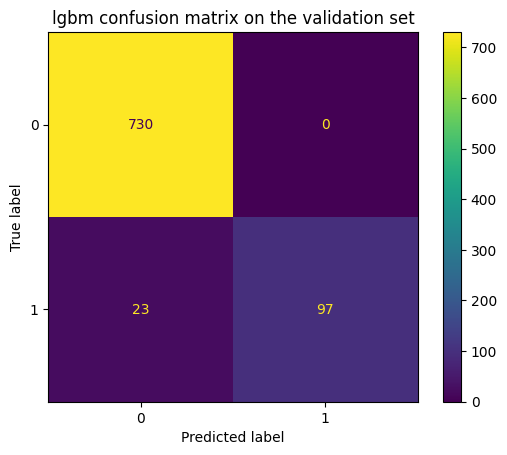

              precision    recall  f1-score   support

  not_churnd       0.97      1.00      0.98       730
     churned       1.00      0.81      0.89       120

    accuracy                           0.97       850
   macro avg       0.98      0.90      0.94       850
weighted avg       0.97      0.97      0.97       850

0.9085388127853882


<Figure size 640x480 with 0 Axes>

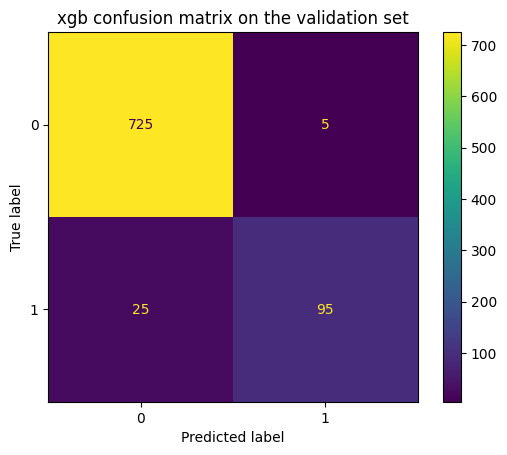

              precision    recall  f1-score   support

  not_churnd       0.97      0.99      0.98       730
     churned       0.95      0.79      0.86       120

    accuracy                           0.96       850
   macro avg       0.96      0.89      0.92       850
weighted avg       0.96      0.96      0.96       850



/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9163470319634702


<Figure size 640x480 with 0 Axes>

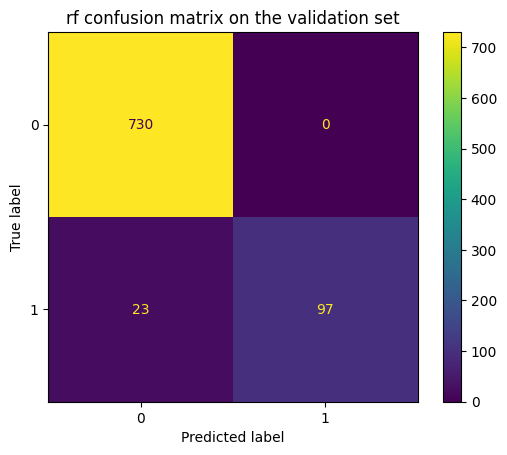

              precision    recall  f1-score   support

  not_churnd       0.97      1.00      0.98       730
     churned       1.00      0.81      0.89       120

    accuracy                           0.97       850
   macro avg       0.98      0.90      0.94       850
weighted avg       0.97      0.97      0.97       850

0.899840182648402


<Figure size 640x480 with 0 Axes>

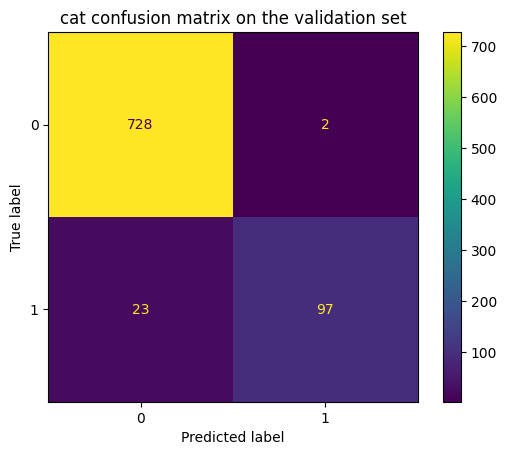

              precision    recall  f1-score   support

  not_churnd       0.97      1.00      0.98       730
     churned       0.98      0.81      0.89       120

    accuracy                           0.97       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.97      0.97      0.97       850



/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9107762557077625


<Figure size 640x480 with 0 Axes>

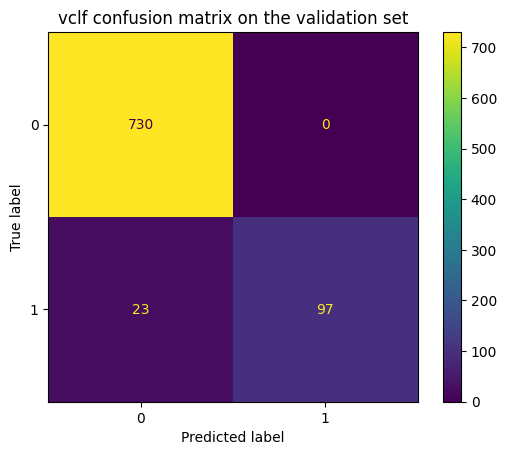

              precision    recall  f1-score   support

  not_churnd       0.97      1.00      0.98       730
     churned       1.00      0.81      0.89       120

    accuracy                           0.97       850
   macro avg       0.98      0.90      0.94       850
weighted avg       0.97      0.97      0.97       850



<Figure size 640x480 with 0 Axes>

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


In [84]:
for model_name in tuned_models:
    model = tuned_models[model_name]
    model.fit(X_train_list['RFE'], y_train)
    y_pred = model.predict(X_val_rfe)
    target_names = ['not_churnd','churned']
                  
    # Get results 
    auc_score = roc_auc_score(np.array(y_val), model.predict_proba(X_val_rfe)[:, 1])
    print(auc_score)
    plot_confusion_matrix(model, model_name, X_val_rfe, y_val)
    print(classification_report(y_val, y_pred, target_names=target_names))

## 3.2 Plot ROC curve

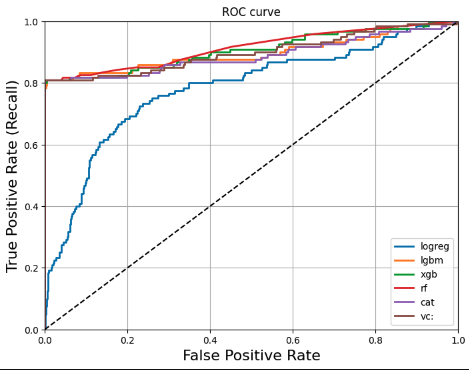

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


/Users/bkhalidson/Documents/2. CMC/projects/venvs/chenv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/bkhalidson/Documents/2. CMC/projects/venvs/chenv/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/bkhalidson/Documents/2. CMC/projects/venvs/chenv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a

[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8


/Users/bkhalidson/Documents/2. CMC/projects/venvs/chenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


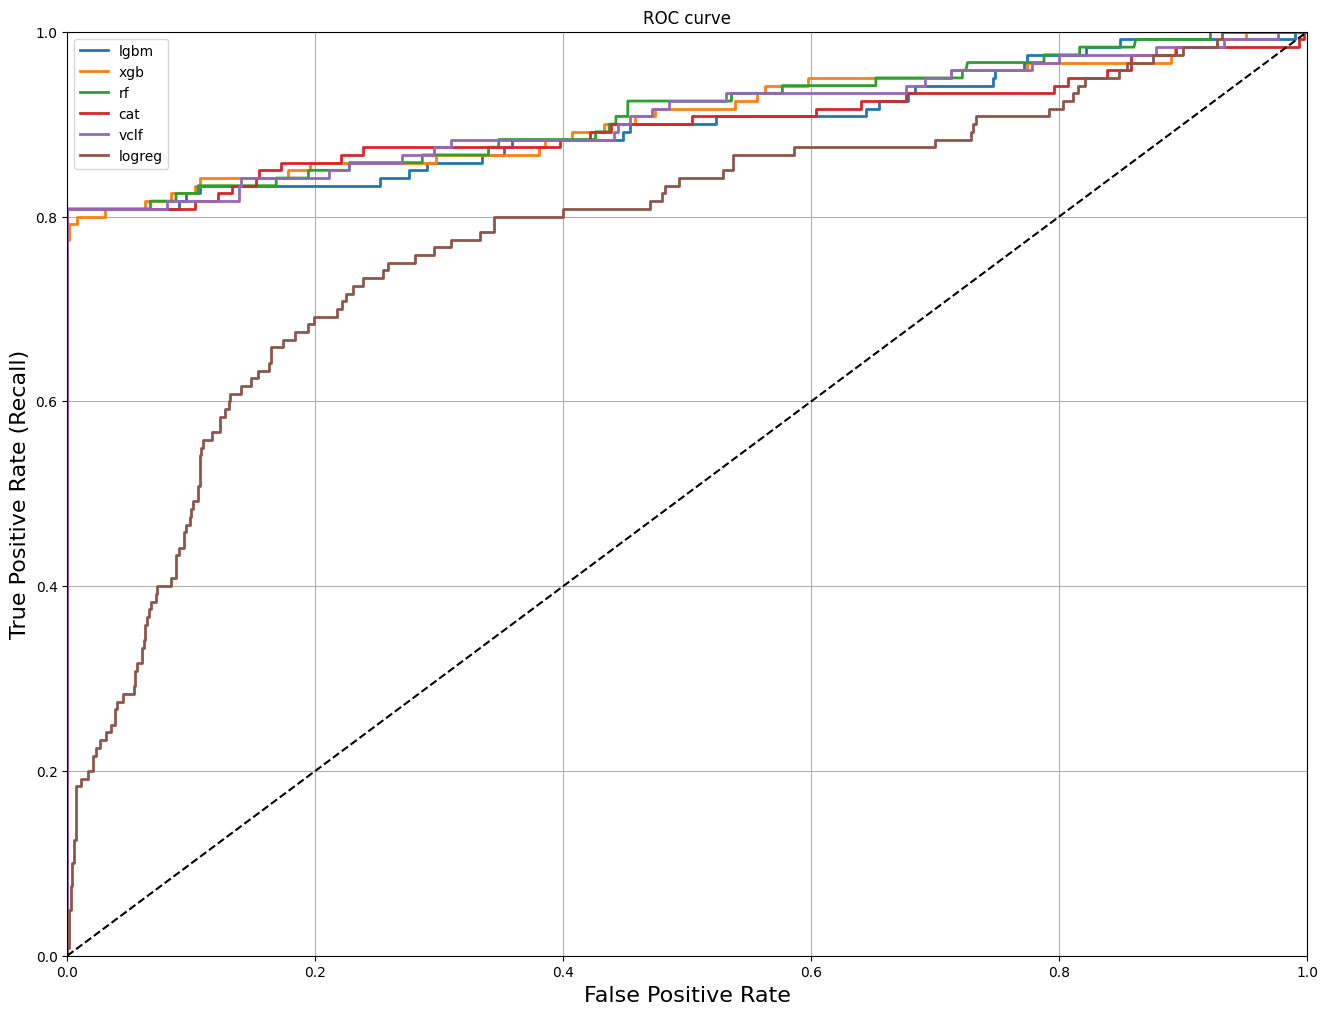

In [73]:
plot_roc_curve(tuned_models, X_val_rfe, y_val)

### 4. Save model

In [37]:
final_model = tuned_models['rf']
final_model.fit(X_train_rfe, y_train)
save_object(obj=final_model, file_name='../pickle_files/final_model')


In [61]:
input_df = X_train_rfe[0].reshape(1,-1)
pred = final_model.predict(input_df)

def convert_pred (pred):
    if pred[0] == 1: 
        return 'Yes'
    else: 
        return 'No'


1

In [50]:
input_df

,0
0,0.00
1,8.90
2,4.00
3,4.00
4,44.16
5,1.00
6,1.00


In [ ]:
{1: 'number_vmail_messages',
 11: 'total_intl_minutes',
 12: 'total_intl_calls',
 14: 'number_customer_service_calls',
 17: 'total_charge',
 18: 'international_plan_no',
 72: 'area_code_area_code_415'}

In [57]:
X_train_datasets['full_dataset']['total_charge'].max()

96.15

### 5. Deploy model to sagemaker endpoint